In [4]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


#IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
dataset= pd.read_csv('weather.csv')
dataset.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


#HANDLING CATEGORICAL DATA

In [7]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('weather.csv') 
x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()
x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[98 120 0.0 ... 23.6 'No' 3.6]
 [148 139 3.6 ... 25.7 'Yes' 3.6]
 [145 115 3.6 ... 20.2 'Yes' 39.8]
 ...
 [135 87 0.0 ... 18.3 'No' 0.0]
 [135 139 0.0 ... 25.9 'No' 0.0]
 [133 162 0.0 ... 28.6 'No' 0.0]]


In [8]:
x = dataset[['MinTemp','Rainfall','Evaporation','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RISK_MM']]
#separate the other attributes from the predicting attribute

In [9]:
y = dataset[['MaxTemp']]
#separte the predicting attribute into Y for model training 

#GRAPHS

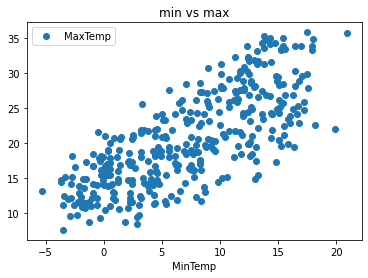

In [10]:
dataset.plot(x='MinTemp', y='MaxTemp' , style='o')
plt.title('min vs max')
plt.show()

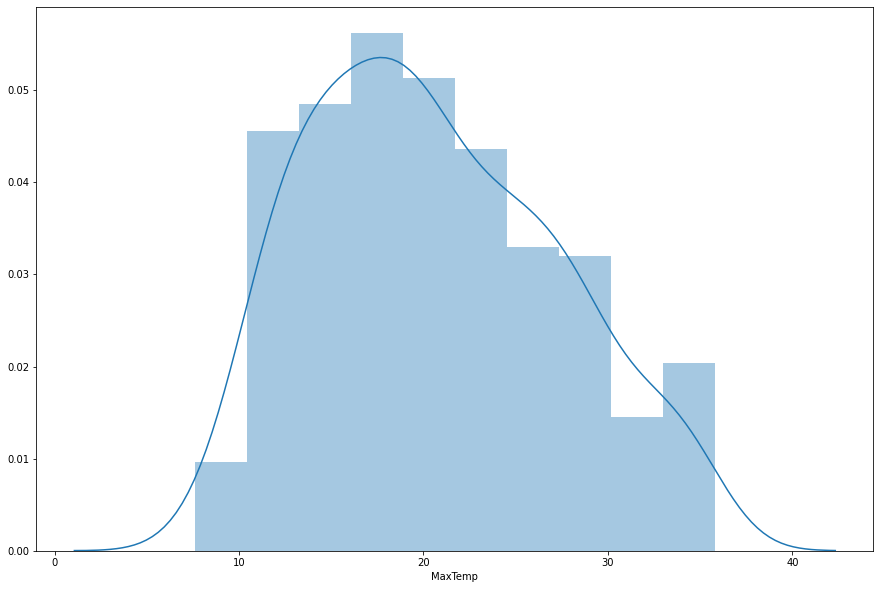

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['MaxTemp'])
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [13]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.80916031 0.         0.91176471 ... 0.77642276 0.58503401 0.        ]
 [0.2480916  0.         0.08823529 ... 0.2601626  0.32312925 0.        ]
 [0.20610687 0.         0.26470588 ... 0.36178862 0.33333333 0.        ]
 ...
 [0.69847328 0.         0.35294118 ... 0.70325203 0.74489796 0.        ]
 [0.48854962 0.         0.47058824 ... 0.61788618 0.5        0.        ]
 [0.29389313 0.         0.19117647 ... 0.42682927 0.5        0.        ]]
[[ 0.61450382  0.          0.39705882  0.13461538  0.50819672  0.22891566
   0.60459184  0.5467033   0.125       0.125       0.60569106  0.65306122
   0.        ]
 [ 0.13358779  0.          0.02941176  0.46153846  1.          0.5060241
   0.59183673  0.46978022  0.875       0.375       0.04878049  0.20068027
   0.        ]
 [ 0.79389313  0.13567839  0.45588235  0.13461538  0.90163934  0.87951807
   0.34693878  0.32417582  1.          1.          0.67073171  0.50680272
   0.03517588]
 [ 0.70992366  0.00502513  0.47058824  0.32692308  0.52459016  0.506

#ALGORITHM

In [14]:
model =LinearRegression()
#loading the model constructor

#FITTING OF TRAINING DATA

In [15]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
print('Intercept is :',model.intercept_)

Intercept is : [27.01321134]


In [17]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[-2.24072168e-02 -1.15517900e-02  5.91958657e-02 -8.58077490e-03
   6.70848785e-04  1.80128608e-02  1.81056309e-02 -4.41630720e-02
  -2.94378789e-02  2.30080630e-02  9.33064920e-02  9.39000870e-01
  -1.40109918e-02]]


#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [18]:
predictions = model.predict(x_test)

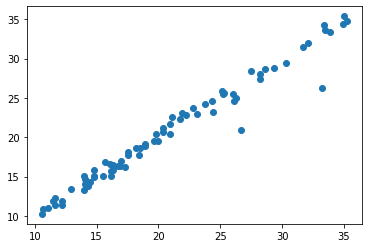

In [19]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !!it is almost forming a linear line with less deviation

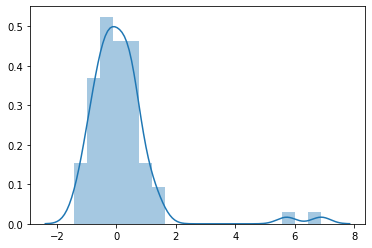

In [21]:
import seaborn as sns
sns.distplot((y_test-predictions))

#EVALUATION

In [22]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [23]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([[25.44700308],
       [11.9388849 ],
       [22.5372776 ],
       [22.89808226],
       [21.23733704],
       [24.60953715],
       [34.46243654],
       [16.41018446],
       [13.78225306],
       [18.61815712],
       [17.75674281],
       [15.90624065],
       [12.34298165],
       [11.40457032],
       [16.23214677],
       [17.78342743],
       [14.08921366],
       [22.96970811],
       [15.86811827],
       [28.76592148],
       [19.47311896],
       [14.69689076],
       [35.38859448],
       [13.33304387],
       [15.66103816],
       [11.05611909],
       [29.4352922 ],
       [24.65353373],
       [28.63772185],
       [21.71844991],
       [28.09571267],
       [25.48769807],
       [31.97848987],
       [27.41169041],
       [22.27130603],
       [16.32093746],
       [33.59486365],
       [31.47504019],
       [11.45345014],
       [25.61349334],
       [18.10806484],
       [16.48187085],
       [18.66216898],
       [10.26467312],
       [34.26452538],
       [15

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [24]:
y_train = y_train[0:74]

In [25]:
from sklearn.metrics import confusion_matrix

cutoff = 0.7                                   # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

results =confusion_matrix(y_train_classes, y_pred_classes)
print(results)

[[74]]


Precision, Recall, Support, Fscore

In [26]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

precision_recall_fscore_support(y_train_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [27]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

results =confusion_matrix(y_test_classes, y_pred_classes)
print(results)

[[74]]


Precision, Recall, Support, Fscore

In [28]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)